<a href="https://colab.research.google.com/github/nishujain2203/DL-2-august-weekend/blob/main/DL_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as  np
import  pandas as  pd
import seaborn as  sns
import matplotlib.pyplot as plt
from warnings  import  filterwarnings
filterwarnings('ignore')


In [32]:
path = r"/content/e_commerce.csv"

In [33]:
df  = pd.read_csv(path  , keep_default_na= False  , na_values= ["" , "NA"])

In [34]:
df.head()

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110.0,197,87,244.7,91,11.01,10.0,3,2.70,1.0,0
1,107,415,3717191,no,yes,26,162,27,17,123.0,196,103,254.4,103,11.45,13.7,3,3.70,1.0,0
2,137,415,3581921,no,no,0,243,41,10,114.0,121,110,162.6,104,7.32,12.2,5,3.29,0.0,0
3,84,408,3759999,yes,no,0,299,51,5,71.0,62,88,196.9,89,8.86,6.6,7,1.78,2.0,0
4,75,415,3306626,yes,no,0,167,28,13,113.0,148,122,186.9,121,8.41,10.1,3,2.73,3.0,0


In [35]:
df.duplicated().sum()

np.int64(0)

seperate X & Y

In [36]:
x = df.drop('churn' , axis = 1)
y = df['churn']

Seperate cat and numeric data


In [37]:
cat = x.columns[x.dtypes == 'object']
num = x.columns[x.dtypes != 'object']

create pipeline

In [38]:
from sklearn.pipeline import  Pipeline
from  sklearn.preprocessing import  StandardScaler ,  OrdinalEncoder
from sklearn.compose import  ColumnTransformer
from sklearn.impute import  SimpleImputer

In [39]:
num_pipeline  =  Pipeline(steps = [('imputer' ,  SimpleImputer(strategy= 'mean')) ,
                                   ('scaler' ,  StandardScaler ()  )]   )
cat_pipeline  =  Pipeline(steps = [('imputer' ,  SimpleImputer(strategy= 'most_frequent' )) ,
                                   ('encoder' , OrdinalEncoder())])

In [40]:
pre = ColumnTransformer([('num' ,  num_pipeline ,  num )  , ('cat' ,  cat_pipeline , cat ) ])


In [41]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['account length', 'location code', 'user id', 'add to wishlist',
       'desktop sessions', 'app sessions', 'desktop transactions',
       'total product detail views', 'session duration', 'promotion clicks',
       'avg order value', 'sale product views',
       'discount rate per visited products',
       'product detail view per app session', 'app transactions',
       'add to cart per session', 'customer service calls'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder())]),
                                 Index(['credit card info save', 'push status'], dtype='object'))])

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   account length                       3333 non-null   int64  
 1   location code                        3333 non-null   int64  
 2   user id                              3333 non-null   int64  
 3   credit card info save                3333 non-null   object 
 4   push status                          3333 non-null   object 
 5   add to wishlist                      3333 non-null   int64  
 6   desktop sessions                     3333 non-null   int64  
 7   app sessions                         3333 non-null   int64  
 8   desktop transactions                 3333 non-null   int64  
 9   total product detail views           3281 non-null   float64
 10  session duration                     3333 non-null   int64  
 11  promotion clicks              

In [43]:
# transform data
x_scaled = pre.fit_transform(x)


In [44]:
cols = []
for i in pre.get_feature_names_out():
  cols.append(i.split('__')[1])

In [45]:
x_scaled = pd.DataFrame(x_scaled , columns= pre.get_feature_names_out())

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train , x_test  , y_train , y_test = train_test_split(x_scaled , y , random_state = 4 , test_size= 0.2)

In [48]:
print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

(2666, 19) (2666,)
(667, 19) (667,)


In [49]:
from keras.models import Sequential
from keras.layers import Input , Dense , Dropout

In [50]:
nn =  Sequential()
## add input layer
nn.add(Dense(units = x_train.shape[1] , kernel_initializer = 'he_uniform' , activation = 'relu'))



## hidden layer
nn.add(Dense(100 ,kernel_initializer = 'he_uniform' , activation = 'relu'))
nn.add(Dropout(0.2))



nn.add(Dense(200 ,kernel_initializer = 'he_uniform' , activation = 'relu'))
nn.add(Dropout(0.3))


## output layer
nn.add(Dense(1 , kernel_initializer='glorot_uniform' , activation= 'sigmoid'))

In [51]:
# compile
nn.compile(optimizer= 'adam' ,loss = 'binary_crossentropy' ,
           metrics=['accuracy'] )

# model fiting

In [53]:
hist = nn.fit(x_train , y_train , validation_split= 0.15 ,
       batch_size= 128 , verbose= 1 , epochs = 50)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9287 - loss: 0.1812 - val_accuracy: 0.9025 - val_loss: 0.2676
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9281 - loss: 0.1904 - val_accuracy: 0.9100 - val_loss: 0.2632
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9334 - loss: 0.1847 - val_accuracy: 0.9050 - val_loss: 0.2649
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9425 - loss: 0.1611 - val_accuracy: 0.9075 - val_loss: 0.2694
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9395 - loss: 0.1760 - val_accuracy: 0.9075 - val_loss: 0.2731
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9284 - loss: 0.1724 - val_accuracy: 0.9100 - val_loss: 0.2713
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9363 - loss: 0.1758 - val_accuracy: 0.9100 - val_loss: 0.2679
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9404 - loss: 0.1785 - val_accuracy: 0.9075 - val_los

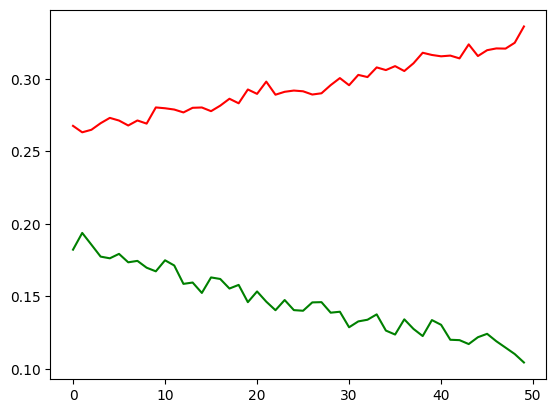

In [54]:
# plot graphs
plt.plot(hist.history['loss'] , c = 'green')
plt.plot(hist.history['val_loss'] , c = 'red')

# evaluate model

In [55]:
from sklearn.metrics import (confusion_matrix, accuracy_score , f1_score ,
 classification_report)

In [59]:
def evaluate(nn , x , y):
  y_pred = nn.predict(x)
  pred = []
  for i in y_pred:
    if i > 0.5 :
      pred.append(1)
    else:
      pred.append(0)
  acc = accuracy_score(y , pred)
  f1 = f1_score(y , pred)
  report = classification_report(y , pred)
  matrix = confusion_matrix(y , pred)

  print(f"acc  -- >  {acc}")
  print(f"f1  -- >  {f1}")
  print(f"classification report  -- >  {report}")
  print(f" confusion matrix  -- > {matrix}")

In [60]:
evaluate(nn , x_train , y_train)

84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
acc  -- >  0.9681170292573144
f1  -- >  0.8830811554332875
classification report  -- >                precision    recall  f1-score   support

           0       0.97      0.99      0.98      2272
           1       0.96      0.81      0.88       394

    accuracy                           0.97      2666
   macro avg       0.97      0.90      0.93      2666
weighted avg       0.97      0.97      0.97      2666

 confusion matrix  -- > [[2260   12]
 [  73  321]]
